# Color image 그려보기(autoencoder)
 - dataset으로 주어진 컬러이미지를 재구현해본다.


In [30]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

In [31]:
(X_train,_),(X_test,_) = cifar10.load_data()  # bring data

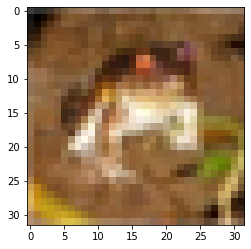

In [32]:
plt.imshow(X_train[0])

In [33]:
X_train.shape   # 5만개 데이터,    3:channel이라는 부분 중요!  32*32(행*열)*3(채널)

(50000, 32, 32, 3)

In [34]:
L, W, H, C = X_train.shape    # 1만개 데이터, L:length, W:width, H:height, C:channel

In [35]:
X_train = X_train.reshape(-1, W*H*C).astype('float32')/255
# astype('float32'):수치를 구체적으로 나타내어 loss 줄이기 위해 추가
# -1: 알아서 넣어줘, 255: 가장 큰값으로 나누어서 표준화???  -> 컬러이미지 처리 방법

In [36]:
X_test = X_test.reshape(-1, W*H*C).astype('float32')/255

In [37]:
#X_train.shape
X_test.shape

(10000, 3072)

### 모델 구축

In [38]:
inputs = keras.Input(shape = (3072,))
encoded = layers.Dense(32, activation = 'relu')(inputs)
latent = layers.Dense(32, activation = 'relu')(encoded)  
# latent: autoencoder fit(학습) 결과 epoch(5)부터 학습이 안되는 걸로 파악되어 loss 줄이기 위해 추가함
decoded = layers.Dense(3072, activation = 'sigmoid')(latent)  #output으로 사용
autoencoder = Model(inputs = inputs, outputs = decoded)

In [39]:
autoencoder.compile(optimizer='adam', loss='mse')  # 학습알고리즘:adam, 손실함수:평균오차제곱

In [42]:
autoencoder.fit(X_train, X_train, epochs=10, shuffle = True, validation_data=(X_test, X_test), batch_size=256)

Epoch 1/10
196/196 [==============================] - 6s 23ms/step - loss: 0.0470 - val_loss: 0.0393
Epoch 2/10
196/196 [==============================] - 5s 24ms/step - loss: 0.0380 - val_loss: 0.0366
Epoch 3/10
196/196 [==============================] - 4s 22ms/step - loss: 0.0345 - val_loss: 0.0326
Epoch 4/10
196/196 [==============================] - 4s 22ms/step - loss: 0.0319 - val_loss: 0.0313
Epoch 5/10
196/196 [==============================] - 4s 23ms/step - loss: 0.0310 - val_loss: 0.0308
Epoch 6/10
196/196 [==============================] - 4s 22ms/step - loss: 0.0308 - val_loss: 0.0307
Epoch 7/10
196/196 [==============================] - 5s 27ms/step - loss: 0.0308 - val_loss: 0.0307
Epoch 8/10
196/196 [==============================] - 4s 22ms/step - loss: 0.0308 - val_loss: 0.0306
Epoch 9/10
196/196 [==============================] - 4s 22ms/step - loss: 0.0307 - val_loss: 0.0306
Epoch 10/10
196/196 [==============================] - 4s 22ms/step - loss: 0.0307 - val_lo

313/313 [==============================] - 1s 3ms/step


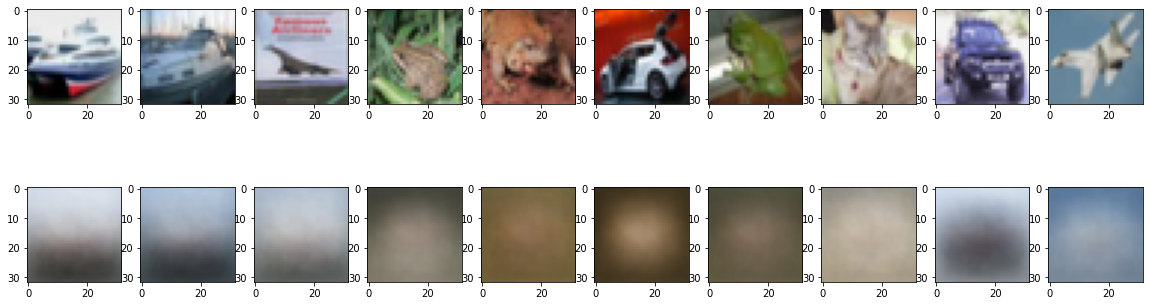

In [43]:
decoded_img = autoencoder.predict(X_test)

n=10  # ?표시 이미지 개수?
plt.figure(figsize = (20, 6))
for i in range(1,n+1):
    ax = plt.subplot(2, n, i)  # 행이 2개, n, i:?
    plt.imshow(X_test[i].reshape(32, 32,3))  # 이미지 보여줌
    ax = plt.subplot(2, n, i+n)
    plt.imshow(decoded_img[i].reshape(32, 32,3))